<b>Q1.</b> What questions did I initially ask?
- How does amenity count relate to park size?
- How does amenity count change by borough?
- How does park size change by borough?
- How does the number of people served by each park vary by borough?
- If there a relationship between park size and the # of people living within a 10MW?
- What are the most popular amenities in each borough? throughout the city?

In [8]:
# bring in data and calculate total amenity count
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

parkinfo_df = pd.read_csv(r'/Users/emmaleedolfi/springboard_datascience/Capstone/ParkFeatures_joined.csv', index_col = 'GISPROPNUM')
parkinfo_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1705 entries, B001 to XT03
Data columns (total 33 columns):
Unnamed: 0          1705 non-null int64
BOROUGH             1705 non-null object
ACRES               1705 non-null float64
SIGNNAME            1705 non-null object
TYPECATEGO          1705 non-null object
handball            1705 non-null float64
tennis              1705 non-null float64
basketball          1705 non-null float64
adult_soft          1705 non-null float64
track_and           1705 non-null float64
play_area_count     1705 non-null float64
preserve_count      1705 non-null float64
spray_count         1705 non-null float64
OBJECTID            1705 non-null int64
TPL_P_NAME          1705 non-null object
FREQUENCY           1705 non-null int64
SUM_SVCAREA         1705 non-null float64
SUM_TOTPOPSVCA      1705 non-null int64
SUM_KIDSVCA         1705 non-null int64
SUM_YOUNGPROSVCA    1705 non-null int64
SUM_SENIORSVCA      1705 non-null int64
SUM_HHILOWSVCA      1705 non-nu

In [15]:
parkinfo_df['total_amenities'] = sum([parkinfo_df.handball, parkinfo_df.tennis, parkinfo_df.basketball, parkinfo_df.adult_soft, parkinfo_df.track_and, parkinfo_df.play_area_count, parkinfo_df.preserve_count, parkinfo_df.spray_count])
parkinfo_df.head()
parkinfo_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1705 entries, B001 to XT03
Data columns (total 34 columns):
Unnamed: 0          1705 non-null int64
BOROUGH             1705 non-null object
ACRES               1705 non-null float64
SIGNNAME            1705 non-null object
TYPECATEGO          1705 non-null object
handball            1705 non-null float64
tennis              1705 non-null float64
basketball          1705 non-null float64
adult_soft          1705 non-null float64
track_and           1705 non-null float64
play_area_count     1705 non-null float64
preserve_count      1705 non-null float64
spray_count         1705 non-null float64
OBJECTID            1705 non-null int64
TPL_P_NAME          1705 non-null object
FREQUENCY           1705 non-null int64
SUM_SVCAREA         1705 non-null float64
SUM_TOTPOPSVCA      1705 non-null int64
SUM_KIDSVCA         1705 non-null int64
SUM_YOUNGPROSVCA    1705 non-null int64
SUM_SENIORSVCA      1705 non-null int64
SUM_HHILOWSVCA      1705 non-nu

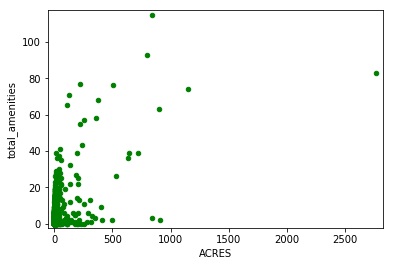

In [21]:
# how does amenity count relate to park size?

parkinfo_df.plot('ACRES', 'total_amenities', kind='scatter', color = 'green')

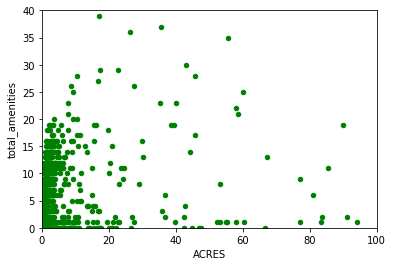

In [24]:
# this doesn't tell us too much, since we have some outliers that are effecting the visualization of the data. 
# I'll create another with set axes

parkinfo_df.plot('ACRES', 'total_amenities', kind='scatter', color = 'green')
plt.ylim(0,40)
plt.xlim(0,100)
plt.show()

We can conclude from this plot that there are many small parks with lots of amenities. There does not seem to be strong correlation between these two variables, but we will explore this more later.

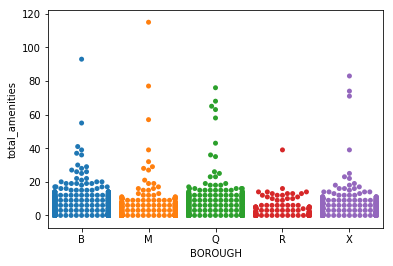

In [25]:
# How does amenity count change by borough?

sns.swarmplot(x=parkinfo_df.BOROUGH, y=parkinfo_df.total_amenities)

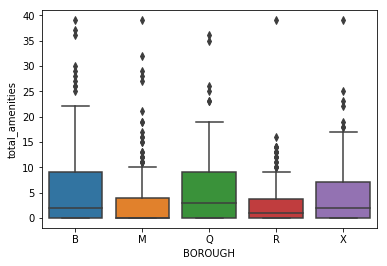

In [27]:
parkinfo_sub = parkinfo_df[parkinfo_df.total_amenities <= 40]
sns.boxplot(x=parkinfo_sub.BOROUGH, y=parkinfo_sub.total_amenities)

After removing outliers, we see the following:
- there are still many outliers in the data
- Manhattan has the lowest median # of park amenities, Queens has the highest
- Brooklyn and Queens appear to have the most parks with high amenity counts

Now let's look at park size by borough:

In [31]:
parkinfo_df.ACRES.describe()

count    1705.000000
mean       16.094026
std        99.697294
min         0.000000
25%         0.381000
50%         0.949000
75%         2.270000
max      2771.747000
Name: ACRES, dtype: float64

We can see from these summary statistics that there are extreme outliers when looking at park acreage. I'll look at the boxplot of a subset of the data - parks less then 10 acres (which will include well over 75% of our data!).

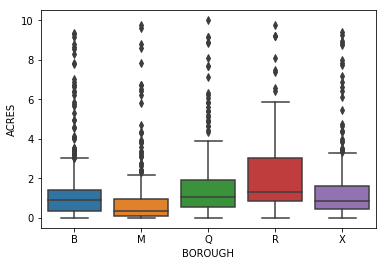

In [34]:
small_parks = parkinfo_df[parkinfo_df.ACRES <= 10]
sns.boxplot(x=small_parks.BOROUGH, y=small_parks.ACRES)

We can see that most parks are less than 4 acres across all boroughs. A few additional observations:
- Staten Island tends to have larger parks on average then the other boroughs.
- Manhattan parks are relatively small. 
- Brooklyn, Queens, and the Brona are fairly similar in terms of park size. These 3 borough were quite similar in amenity count as well, but Queens had the highest median park amenity count.

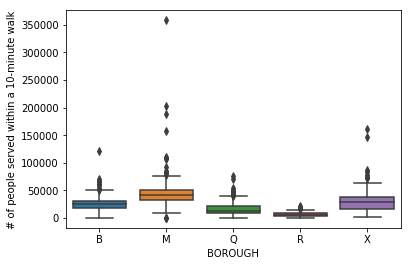

In [38]:
# How does the number of people served by each park vary by borough? Is there a relationship with park size?

sns.boxplot(x=parkinfo_df.BOROUGH, y=parkinfo_df.SUM_TOTPOPSVCA)
plt.ylabel('# of people served within a 10-minute walk')
plt.show()

We can see that Manhattan parks tend to serve the most people within a 10-minute walk. Staten Island parks serve the fewest # of people within a 10-minute walk. Again, Brooklyn, Queens, and the Bronx are quite similar here.

Let's look at parks that serve 100K people or less:

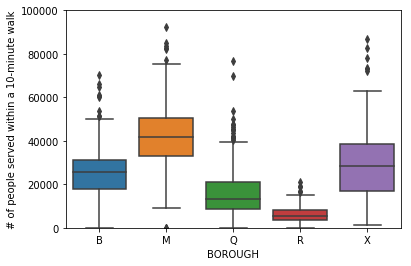

In [39]:
sns.boxplot(x=parkinfo_df.BOROUGH, y=parkinfo_df.SUM_TOTPOPSVCA)
plt.ylim(0,100000)
plt.ylabel('# of people served within a 10-minute walk')
plt.show()

We can now see major differences between Brooklyn, Queens and the Bronx. The median # of people within  10MW for Queens parks is much lower than the other two. The # of people within a 10MW of parks in the Bronx tends to vary more than the # for Brooklyn parks.

Let's now look at park size vs. # of people within a 10MW (with outliers removed):

(0, 10)

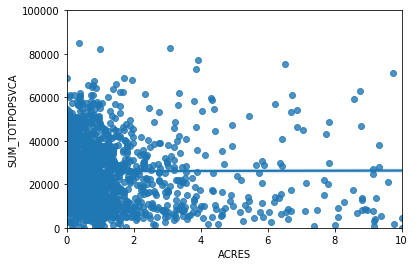

In [43]:
sns.regplot(x=parkinfo_df.ACRES, y=parkinfo_df.SUM_TOTPOPSVCA)
plt.ylim(0,100000)
plt.xlim(0,10)

(0, 40)

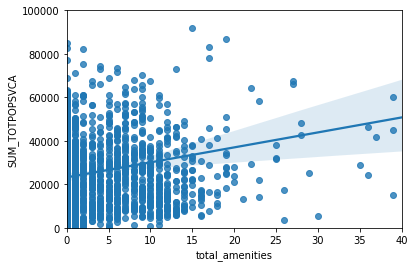

In [44]:
sns.regplot(x=parkinfo_df.total_amenities, y=parkinfo_df.SUM_TOTPOPSVCA)
plt.ylim(0,100000)
plt.xlim(0,40)

There does not seems to be a positive or negative correlation between # of people served and park size. The population served within a 10MW is related to the population density immediately surrounding the park - it would be worth looking into which park types serve the most people. 

Amenity count vs. population within a 10MW appears to have a stronger positive correlation than 10MW population vs. park size, but does not appear substantial.

In [50]:
# What are the most popular amenities in each borough? throughout the city?
parkinfo_df.TYPECATEGO.value_counts()

Jointly Operated Playground    266
Neighborhood Park              261
Schoolyard-Playground          220
Playground                     217
Garden                         182
Triangle/Plaza                 144
Community Park                 101
Recreation Field/Courts         64
Nature Area                     63
Schoolyards to Playgrounds      27
Tracking                        25
Parkway                         22
Undeveloped                     21
Buildings/Institutions          19
Restrictive Declaration         16
Flagship Park                   15
Waterfront Facility             12
Historic House Park             12
Managed Sites                    8
Mall                             6
Strip                            2
Park                             1
Schoolyard to Playground         1
Name: TYPECATEGO, dtype: int64

In [53]:
parkinfo_df['top_amenity'] = parkinfo_df[['handball', 'tennis', 'basketball', 'adult_soft', 'track_and', 'play_area_count', 'preserve_count', 'spray_count']].idxmax(axis=1)

parkinfo_df.top_amenity.head(20)

GISPROPNUM
B001    play_area_count
B002           handball
B003           handball
B006           handball
B007             tennis
B008           handball
B010           handball
B012    play_area_count
B016    play_area_count
B017           handball
B018         adult_soft
B019    play_area_count
B021           handball
B022    play_area_count
B023           handball
B025           handball
B026    play_area_count
B028           handball
B032             tennis
B035           handball
Name: top_amenity, dtype: object

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

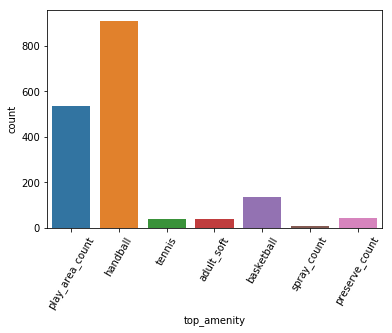

In [59]:
sns.countplot('top_amenity', data=parkinfo_df)
plt.xticks(rotation=60)

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

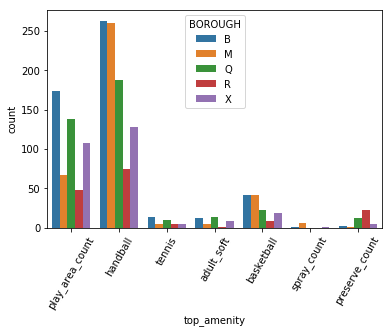

In [61]:
# it looks like handball courts are the most common amenity in NYC parks
# let's look by borough

sns.countplot('top_amenity',hue='BOROUGH', data=parkinfo_df)
plt.xticks(rotation=60)

<b>Summary of Conclusions:</b>

- Amenity count does not appear to be strongly correlated with park size. There are many small parks with a high amenity count.
- Manhattan has the lowest median # of park amenities and Queens has the highest.
- Staten Island tends to have larger parks on average then the other boroughs. Manhattan parks are relatively small.
- There does not seems to be a strong correlation between # of people served and park size, or # of people served and amenity count.
- Handball courts are the most popular amenities in NYC parks. Brooklyn has the highest number of handball courts and play areas/playgrounds. Staten Island has the highest number of preserves in their park system. 

What to explore next? -- do a similar data exploration with twitter data! (once in hand)